# Cálculo de Retornos acumulados & Drwadown

In [375]:
# Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import mplfinance as mpf
import math
import os

import ta # librería para indicadores técnicos
from scipy.stats import norm # Para la distribución normal
from math import sqrt

from io import StringIO

In [376]:
# Definir Ticker
ticker = "MSFT"
ticker1 = yf.Ticker(ticker)

# Obtener información general de la empresa
info_empresa = ticker1.info
longName = str(info_empresa['longName'])
industry = str(info_empresa['industry'])
marketCap = round((info_empresa['marketCap'] / 1e9),2)

In [377]:
# Definir fechas
today = date.today()

end = today - timedelta(days = 1)
start = end - timedelta(days = 1460)
today_format = today.strftime("%Y-%m-%d") # Formato: YYYY-MM-DD#Definir fechas de análisis
start = start.strftime("%Y-%m-%d")
end = end.strftime("%Y-%m-%d")

In [378]:
#Descargar data de ticker desde yfinance
data = yf.download(ticker, start = start , end = end)

<ipython-input-378-4de1882c9c08>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = start , end = end)
[*********************100%***********************]  1 of 1 completed


In [379]:
# Preview data
data.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2021-08-12,280.351227,280.506008,276.994479,277.275022,14561300
2021-08-13,283.292053,283.340410,279.857899,280.032047,18249000
2021-08-16,284.984894,285.197715,280.554359,283.620910,22507600
2021-08-17,283.514465,283.853048,281.579741,282.847013,20075300
2021-08-18,281.779694,285.743777,281.333834,283.049362,21813000


In [380]:
# Save the data to CSV file
data.to_csv("data.csv")

In [381]:
# Leer la data from CSV file
data = pd.read_csv("data.csv", index_col=[0], header=0, skiprows=2, parse_dates=[0])
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
Date,,,,,
2021-08-12,280.351227,280.506008,276.994479,277.275022,14561300
2021-08-13,283.292053,283.340410,279.857899,280.032047,18249000
2021-08-16,284.984894,285.197715,280.554359,283.620910,22507600
2021-08-17,283.514465,283.853048,281.579741,282.847013,20075300
2021-08-18,281.779694,285.743777,281.333834,283.049362,21813000
...,...,...,...,...,...
2025-08-04,535.640015,538.250000,528.130005,528.270020,25349000
2025-08-05,527.750000,537.299988,527.239990,537.179993,19171600
2025-08-06,524.940002,531.700012,524.030029,530.900024,21355700


In [382]:
data.columns = ['Close', 'High', 'Low', 'Open','Volume']

In [383]:
data = data.iloc[2:]

In [384]:
data.index = pd.to_datetime(data.index, errors='coerce')

In [385]:
# Desc statistics
data.describe()

,Close,High,Low,Open,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,343.480720,346.666337,340.000957,343.405226,2.572855e+07
std,76.267682,76.385677,76.069035,76.290326,1.044130e+07
min,209.393295,215.413662,208.591834,212.618450,7.164500e+06
25%,279.805504,282.679970,275.053351,279.979862,1.883232e+07
50%,327.837997,330.963610,325.052637,328.090468,2.312120e+07
75%,411.623947,414.739600,408.175648,412.480356,2.969512e+07
max,535.640015,555.450012,531.900024,555.229980,9.042890e+07


In [386]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2021-08-16 to 2025-08-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1000 non-null   float64
 1   High    1000 non-null   float64
 2   Low     1000 non-null   float64
 3   Open    1000 non-null   float64
 4   Volume  1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 46.9 KB


## Cálculo de Retornos Diarios

In [387]:
# Calculate Daily Returns
data["d_returns"] = np.log(data.Close.div(data.Close.shift(1)))

<ipython-input-387-b330461d6ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["d_returns"] = np.log(data.Close.div(data.Close.shift(1)))


In [388]:
data.dropna(inplace=True)

<ipython-input-388-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


## Cálculo de Retornos Acumulados

In [389]:
# Calculate Sum Returns
data.d_returns.sum()

0.6053079965601036

In [390]:
# Si hubiesemos invertido un dolar
dolar_invest = np.exp(data.d_returns.sum())
dolar_invest = round(dolar_invest,2)
dolar_invest

1.83

In [391]:
# Step by Step
data["cummreturns"] = data.d_returns.cumsum().apply(np.exp)

<ipython-input-391-4a70b1b2492e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cummreturns"] = data.d_returns.cumsum().apply(np.exp)


In [392]:
data.head()

,Close,High,Low,Open,Volume,d_returns,cummreturns
Date,,,,,,,
2021-08-17,283.514465,283.853048,281.579741,282.847013,20075300,-0.005173,0.994840
2021-08-18,281.779694,285.743777,281.333834,283.049362,21813000,-0.006138,0.988753
2021-08-19,287.633698,288.312159,279.754011,279.802460,29850500,0.020562,1.009295
2021-08-20,294.990051,296.424499,288.884013,290.492912,40817600,0.025254,1.035108
2021-08-23,295.271088,295.997998,292.557300,293.914194,22830200,0.000952,1.036094


In [393]:
# Fechas Sombreadas
a = data["cummreturns"].idxmax().date()
b = a + timedelta(5)
c = a - timedelta(5)

## Grafica de Retornos Acumulados en el Tiempo

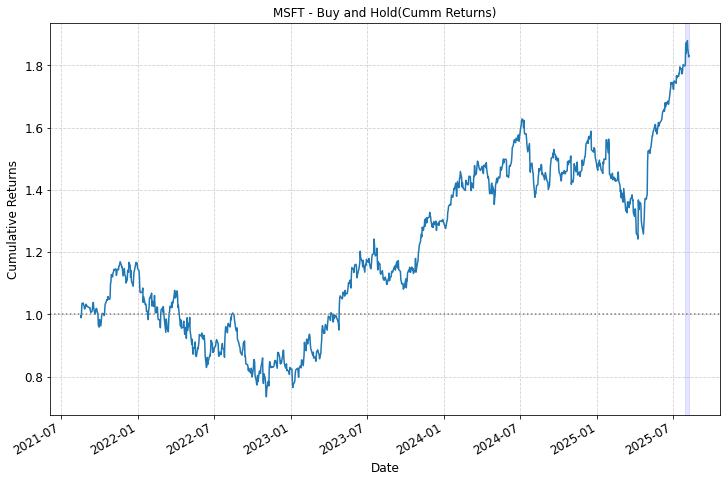

In [394]:
# Chart
data.cummreturns.plot(figsize=(12,8), title = f'{ticker} - Buy and Hold(Cumm Returns)', fontsize= 12 )
# 3. Axis Labels
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
#plt.legend(fontsize=10)
# Linea Horizontal de referencia
plt.axhline(1.0, color='gray', linestyle=':', linewidth=1.5, label='Break-even (1.0x)')
# Sombra para resaltar periodo de la grafica
plt.axvspan(c, b, color='blue', alpha=0.1, label='Recovery Period')

# Guarda la figura
nombre_imagen1 = f'{ticker} - Buy and Hold(Cumm Returns) Plot.png'

plt.savefig(
    nombre_imagen1,
    dpi=300,        # Resolución en puntos por pulgada (dots per inch). Mayor DPI = mayor calidad.
    bbox_inches='tight', # Elimina el espacio en blanco extra alrededor del gráfico
    facecolor='white',   # Fondo blanco para el gráfico guardado (útil si tu tema es oscuro)
    transparent=False    # Si es True, el fondo será transparente (para PNG).
)

plt.show()

In [395]:
#Calculate Average Annual Return
data.d_returns.mean()*252

0.1526903054385847

In [396]:
#Calculate Annual Standard Desviation
data.d_returns.std()*np.sqrt(252)

0.2703408836368986

## Cálculo de Retornos Acumulados Máximos 

In [397]:
# Calculo de Cumm Max
data["cummmax"] = data.cummreturns.cummax()

<ipython-input-397-ca8574eea159>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cummmax"] = data.cummreturns.cummax()


In [398]:
# Cálculo Cumm Max
data.cummmax.max()

1.8795382713392146

In [399]:
# Identificar Drawdown Max
data.cummmax.idxmax()

Timestamp('2025-08-04 00:00:00')

## Gráfica de Retornos Acumulados y Acumulados Máximos

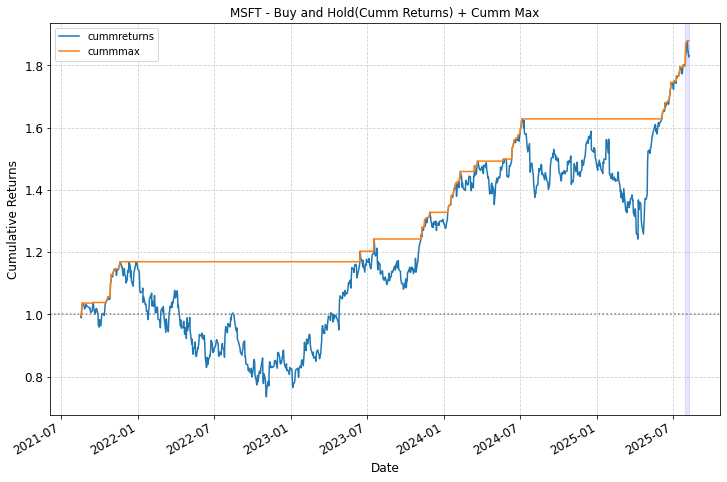

In [400]:
# Chart
data[["cummreturns","cummmax"]].plot(figsize=(12,8), title = f'{ticker} - Buy and Hold(Cumm Returns) + Cumm Max', fontsize= 12 )

# 3. Add details
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
# Linea Horizontal de referencia
plt.axhline(1.0, color='gray', linestyle=':', linewidth=1.5, label='Break-even (1.0x)')
# Sombra para resaltar peiodo de la grafica
plt.axvspan(c, b, color='blue', alpha=0.1, label='Recovery Period')

# Guarda la figura
nombre_imagen2 = f'{ticker} - Buy and Hold(Cumm Returns) + Cumm Max_Plot.png'

plt.savefig(
    nombre_imagen2,
    dpi=300,        # Resolución en puntos por pulgada (dots per inch). Mayor DPI = mayor calidad.
    bbox_inches='tight', # Elimina el espacio en blanco extra alrededor del gráfico
    facecolor='white',   # Fondo blanco para el gráfico guardado (útil si tu tema es oscuro)
    transparent=False    # Si es True, el fondo será transparente (para PNG).
)

# Visualizar en Notebook

plt.show()

## Cálculo de Drawdown

In [401]:
# Calculo de Drawdown
data["drawdown"] = data["cummmax"]-data["cummreturns"]

<ipython-input-401-50b1a8a5d803>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["drawdown"] = data["cummmax"]-data["cummreturns"]


In [402]:
# Cálculo de Drawdown Max
data.drawdown.max()

0.434276322940208

In [403]:
# Identificar Drawdown Max
data.drawdown.idxmax()

Timestamp('2022-11-03 00:00:00')

In [404]:
data.drawdown.idxmax().date()

datetime.date(2022, 11, 3)

In [405]:
data.loc[(data.index=="2023-01-03")]

,Close,High,Low,Open,Volume,d_returns,cummreturns,cummmax,drawdown
Date,,,,,,,,,
2023-01-03,234.808929,240.856056,232.672335,238.239229,25740000,-0.001001,0.823935,1.169029,0.345094


## Cálculo Drawdown %

In [406]:
data["drawdown_pct"] = (data["cummmax"]-data["cummreturns"])/data["cummmax"]

<ipython-input-406-7abf1966b25c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["drawdown_pct"] = (data["cummmax"]-data["cummreturns"])/data["cummmax"]


In [407]:
# Cálculo del Drawdown Max %
drawdown_max_pct = data["drawdown_pct"].max()
drawdown_max_pct = round(drawdown_max_pct,2)
drawdown_max_pct

drawdown_max_pctx100 = round(drawdown_max_pct * 100,2)

In [408]:
# Identificar fecha con Drawdown % Max
data["drawdown_pct"].idxmax()

Timestamp('2022-11-03 00:00:00')

In [409]:
a = data["drawdown_pct"].idxmax().date()
b = a + timedelta(5)
c = a - timedelta(5)

In [410]:
date_= a.strftime('%Y-%m-%d')

In [411]:
data.loc[(data.index<=date_)]

,Close,High,Low,Open,Volume,d_returns,cummreturns,cummmax,drawdown,drawdown_pct
Date,,,,,,,,,,
2021-08-17,283.514465,283.853048,281.579741,282.847013,20075300,-0.005173,0.994840,0.994840,0.000000,0.000000
2021-08-18,281.779694,285.743777,281.333834,283.049362,21813000,-0.006138,0.988753,0.994840,0.006087,0.006119
2021-08-19,287.633698,288.312159,279.754011,279.802460,29850500,0.020562,1.009295,1.009295,0.000000,0.000000
2021-08-20,294.990051,296.424499,288.884013,290.492912,40817600,0.025254,1.035108,1.035108,0.000000,0.000000
2021-08-23,295.271088,295.997998,292.557300,293.914194,22830200,0.000952,1.036094,1.036094,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-10-28,230.523193,231.236656,220.925805,221.111500,40647700,0.039433,0.808896,1.169029,0.360132,0.308061
2022-10-31,226.867950,229.594699,225.910155,228.460991,28357300,-0.015983,0.796070,1.169029,0.372958,0.319033
2022-11-01,222.997711,230.396117,222.176756,229.281960,30592300,-0.017207,0.782490,1.169029,0.386539,0.330650


## Gráfica de Drawdown %

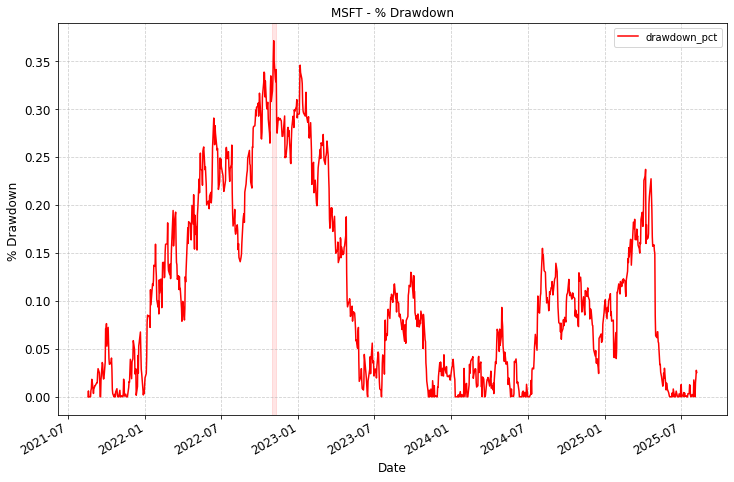

In [412]:
# Chart
data.drawdown_pct.plot(figsize=(12,8), title = f'{ticker} - % Drawdown', fontsize= 12, color="red" )

# 3. Add details
plt.xlabel("Date", fontsize=12)
plt.ylabel("% Drawdown ", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
# Linea Horizontal de referencia
#plt.axhline(1.0, color='gray', linestyle=':', linewidth=1.5, label='Break-even (1.0x)')
# Sombra para resaltar peiodo de la grafica
plt.axvspan(c, b, color='red', alpha=0.1, label='Recovery Period')



#output_folder = "C:\Users\ASUS\Desktop\Proyectos_Desarrollo\06_Trading\02. TSLA" # Reemplaza con el nombre de tu carpeta
#image_filename = f"{ticker}-Drawdown %_Plot.png" # Nombre dinámico
#full_path = os.path.join(output_folder, image_filename)

# Guarda la figura
nombre_imagen3 = f'{ticker} - % Drawdown.png'

plt.savefig(
    nombre_imagen3,
    dpi=300,        # Resolución en puntos por pulgada (dots per inch). Mayor DPI = mayor calidad.
    bbox_inches='tight', # Elimina el espacio en blanco extra alrededor del gráfico
    facecolor='white',   # Fondo blanco para el gráfico guardado (útil si tu tema es oscuro)
    transparent=False    # Si es True, el fondo será transparente (para PNG).
)

# Visualizar Grafico en Notebook
plt.show()

In [413]:
# Save the data to CSV file
data.to_csv("cummreturns.csv")

## Calculo de Dias de Drawdown

In [414]:
#
frecuencias = data['cummmax'].value_counts()
frecuencias

cummmax
1.169029    393
1.628165    230
1.242121     79
1.492486     42
1.327806     29
           ... 
1.537696      1
1.541144      1
1.248352      1
1.347825      1
1.570325      1
Name: count, Length: 81, dtype: int64

In [415]:
dias_drawdown = frecuencias.iloc[0]
dias_drawdown

393

# Construcción Reporte

In [416]:
# Modificar formatos de fecha para reporte
# Start Date
start_dt = datetime.strptime(start, "%Y-%m-%d")                           
start = start_dt.strftime("%m-%d-%Y")

# End Date
end_dt = datetime.strptime(end, "%Y-%m-%d")  
end = end_dt.strftime("%m-%d-%Y")

#  Today Date
todaty_format_dt = datetime.strptime(today_format, "%Y-%m-%d")  
today_format = todaty_format_dt.strftime("%m-%d-%Y")

In [417]:
# Importar libreía Pdf
from fpdf import FPDF

In [418]:
# 1. Create a new PDF object
pdf = FPDF()

# 2. Add a page Page 1. Portada y Resumen Ejecutivo
pdf.add_page()

# 3. Set a font
pdf.set_font("Helvetica","B", size=16)

# 4. Add a cell for the title
# The cell is a rectangular area where content is placed.
pdf.cell(200, 10, txt=f'{ticker} - Financial Analysis Report.', ln=True, align="L")
pdf.ln(10) # Add 10mm of vertical space

# 5. Add more text
pdf.set_font("Helvetica", "B", size=12)
pdf.cell(200, 10, txt=f'Cumm Returns & Drawdown Analysis for {longName}', ln=True)
pdf.set_font("Helvetica", "", size=12)
pdf.cell(200, 10, txt=f'Date Period: From {start} to {end}.', ln=True)
pdf.cell(200, 10, txt=f'Industry: {industry}.', ln=True)
pdf.cell(200, 10, txt=f'MarketCap: {marketCap} Bn.', ln=True)
pdf.cell(200, 10, txt="Executive Summary:", ln=True)
pdf.set_font("Helvetica", size=12)
# Add the paragraph to the PDF
# w: Width of the cell (0 means it extends to the right margin)
# h: Height of each line (in mm)
# txt: The text to be added
# border: Set to 1 to see the cell borders
parrafo = """This report presents a detailed analysis of a financial asset's performance using Python and data science libraries such as Pandas and Matplotlib. Cumulative return was calculated to visualize the investment's historical growth, as well as the maximum cumulative return achieved over the period. Additionally, the asset's downside risk was analyzed using maximum drawdown, a critical metric that measures the largest percentage loss from a peak. The results provide a clear assessment of investment profitability and risk, demonstrating my ability to use quantitative analysis tools and communicate complex findings concisely.."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Helvetica", "", size=12)
pdf.cell(200, 10, txt='Tools: Python Libraries: Pandas, Matplotlib, Seaborn, FPDF, Yfinance, Datetime.', ln=True)
pdf.ln(10) # Add 10mm of vertical spacepdf.cell(200, 10, txt=f'Report Date: {today_format}.', ln=True)

pdf.cell(200,10, text=f'Report Date: {today_format}.', ln=True)

# --- Página 2: Datos y Análisis de Rendimiento Encabezado: "Métricas Clave"
pdf.add_page()  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Accumulated Return & Drawdown Analysis", ln=True, align="L")
pdf.ln(10) # Add 10mm of vertical space

pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Accumulated Return - Interpretation", ln=True, align="L")
pdf.ln(2) # Add 10mm of vertical space

pdf.set_font("Helvetica","", size=10)
# Add the paragraph to the PDF
# w: Width of the cell (0 means it extends to the right margin)
# h: Height of each line (in mm)
# txt: The text to be added
# border: Set to 1 to see the cell borders
parrafo = """Cumulative return is a key metric that represents the total performance of a financial asset over a period of time. It is calculated by multiplying daily (or periodic) returns sequentially."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

parrafo = """The cumulative return value tells you how much an initial investment, say $1, would have grown (or decreased) over a given period. This is the value that truly matters to an investor."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.cell(200, 10, txt=f'Accumulated Return(1$) = {dolar_invest}', ln=True, align="L")
pdf.ln(10) # Add 10mm of vertical space


pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Drawdown - Interpretation", ln=True, align="L")
pdf.ln(2) # Add 10mm of vertical space

pdf.set_font("Helvetica","", size=10)
# Add the paragraph to the PDF
# w: Width of the cell (0 means it extends to the right margin)
# h: Height of each line (in mm)
# txt: The text to be added
# border: Set to 1 to see the cell borders
parrafo = """Drawdown is a measure of the risk of loss that a financial asset or investment portfolio has experienced since its peak. It represents the decline in the value of an investment from its highest point to its lowest point before it recovers to reach a new high."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Arial", 'B', 10)
pdf.cell(200, 10, txt="Drawdown - Key Points", ln=True, align="L")
pdf.ln(2) # Add 10mm of vertical space

pdf.set_font("Helvetica","", size=10)
# parrafo: Pérdida desde el pico: Es el porcentaje de pérdida que sufres si compraste el activo en su punto más alto. Un drawdown del 20% significa que tu inversión ha perdido el 20% de su valor desde que alcanzó su último pico.
parrafo = """Loss since peak: This is the percentage loss you would suffer if you bought the asset at its peak. A 20% drawdown means your investment has lost 20% of its value since its last peak."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.set_font("Helvetica","", size=10)
# parrafo: Drawdown máximo: Esta es la métrica más importante y representa la mayor pérdida porcentual que una inversión ha experimentado durante un período específico. Por ejemplo, si el drawdown máximo de una acción fue del 50% en un año, significa que en algún momento, el activo perdió la mitad de su valor antes de volver a subir.
parrafo = """Maximum drawdown: This is the most important metric and represents the largest percentage loss an investment has experienced over a specific period. For example, if a stock's maximum drawdown was 50% in a year, it means that at some point, the asset lost half of its value before recovering."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.cell(200, 10, txt=f'Maximun Drawdown  % = {drawdown_max_pct} + = {drawdown_max_pctx100}%', ln=True, align="L")
pdf.ln(2) # Add 10mm of vertical space

pdf.set_font("Helvetica","", size=10)
# parrafo: Duración del Drawdown: Mide cuánto tiempo se tarda en recuperar las pérdidas y volver al valor máximo anterior. Un drawdown puede durar días, meses o incluso años.
parrafo = """Drawdown Duration: Measures how long it takes to recover losses and return to the previous peak. A drawdown can last days, months, or even years."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
pdf.ln(2)

pdf.cell(200, 10, txt=f'Maximun Drawdown Duration = {dias_drawdown} days.', ln=True, align="L")
pdf.ln(2) # Add 10mm of vertical space






# --- Página 3: Análisis Gráfico Encabezado: "Distribución de Retornos
pdf.add_page(orientation = 'L')  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Graphic Analysis", ln=True, align="L")

# Agregar la imagen
# pdf.image(nombre, x, y, ancho)
# x=10: 10 mm desde el margen izquierdo.
# y=20: 20 mm desde la parte superior.
# Obtener el ancho de la página y el ancho de la imagen
ancho_pagina = pdf.w
ancho_imagen = 200 # Ancho deseado de la imagen en mm

# Calcular la posición 'x' para centrar la imagen
# Formula: (Ancho de la página - Ancho de la imagen) / 2
x_centrado = (ancho_pagina - ancho_imagen) / 2

pdf.image(nombre_imagen1, x=x_centrado, y=20, w=220)
pdf.ln(150) # Add 10mm of vertical space

pdf.set_font("Arial", '', 12)
parrafo = """Graph Interpretation: Explain what the chart shows. It allows you to visualize the growth or loss of an initial capital (for example, $100) and is one of the most intuitive tools to understand the performance of an asset.."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space


# --- Página 4: Análisis Gráfico Encabezado: "Distribución de Retornos
pdf.add_page(orientation = 'L')  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Graphic Analysis", ln=True, align="L")

# Agregar la imagen
# pdf.image(nombre, x, y, ancho)
# x=10: 10 mm desde el margen izquierdo.
# y=20: 20 mm desde la parte superior.
# Obtener el ancho de la página y el ancho de la imagen
ancho_pagina = pdf.w
ancho_imagen = 200 # Ancho deseado de la imagen en mm

# Calcular la posición 'x' para centrar la imagen
# Formula: (Ancho de la página - Ancho de la imagen) / 2
x_centrado = (ancho_pagina - ancho_imagen) / 2

pdf.image(nombre_imagen2, x=x_centrado, y=20, w=220)
pdf.ln(150) # Add 10mm of vertical space

pdf.set_font("Arial", '', 12)
parrafo = """Graph Interpretation: Explain what the chart shows. A curve with sharp peaks and valleys indicates high volatility. Drawdowns (drops from a peak) are clearly visible as declines on the chart, allowing you to identify periods of greatest losses and how long it took the investment to recover.."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space

# --- Página 5: Análisis Gráfico Encabezado: "Distribución de Retornos
pdf.add_page(orientation = 'L')  # Añade una nueva página en blanco
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Graphic Analysis", ln=True, align="L")

# Agregar la imagen
# pdf.image(nombre, x, y, ancho)
# x=10: 10 mm desde el margen izquierdo.
# y=20: 20 mm desde la parte superior.
# Obtener el ancho de la página y el ancho de la imagen
ancho_pagina = pdf.w
ancho_imagen = 200 # Ancho deseado de la imagen en mm

# Calcular la posición 'x' para centrar la imagen
# Formula: (Ancho de la página - Ancho de la imagen) / 2
x_centrado = (ancho_pagina - ancho_imagen) / 2

pdf.image(nombre_imagen3, x=x_centrado, y=20, w=220)
pdf.ln(150) # Add 10mm of vertical space

pdf.set_font("Arial", '', 12)
parrafo = """Graph Interpretation: Explain what the chart shows. A curve with sharp peaks and valleys indicates high volatility. Drawdowns (drops from a peak) are clearly visible as declines on the chart, allowing you to identify periods of greatest losses and how long it took the investment to recover.."""
pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
# Move the cursor down for the next content
pdf.ln(5) # Add 10mm of vertical space



# 6. Save the PDF
filename_doc = f'{ticker} - Cumm Returns & Drawdown Analysis Report.pdf'
pdf.output(filename_doc)
print(f'The report has been saved successfully.! {filename_doc}')

<ipython-input-418-bdaf86fc17fb>:12: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f'{ticker} - Financial Analysis Report.', ln=True, align="L")
<ipython-input-418-bdaf86fc17fb>:12: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f'{ticker} - Financial Analysis Report.', ln=True, align="L")
<ipython-input-418-bdaf86fc17fb>:17: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=f'Cumm Returns & Drawdown Analysis for {longName}', ln=True)
<ipython-input-418-bdaf86fc17fb>:17: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=f'Cumm Returns & Drawdown Analysis for {longName}', ln=True)
<ipython-input-418-bdaf86fc17fb>:19: DeprecationWarning: The parameter "txt" has been renamed to "text" 

<ipython-input-418-bdaf86fc17fb>:134: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", '', 12)
<ipython-input-418-bdaf86fc17fb>:136: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
<ipython-input-418-bdaf86fc17fb>:143: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", 'B', 16)
<ipython-input-418-bdaf86fc17fb>:144: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="Graphic Analysis", ln=True, align="L")
<ipython-input-418-bdaf86fc17fb>:144: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="Graphic Analysis", ln=True, align="L")
<ipython-input-418-bdaf

The report has been saved successfully.! MSFT - Cumm Returns & Drawdown Analysis Report.pdf


<ipython-input-418-bdaf86fc17fb>:187: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", '', 12)
<ipython-input-418-bdaf86fc17fb>:189: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.multi_cell(w=0, h=5, txt=parrafo, border=0, align="J")
